In [1]:
import pandas as pd

df = pd.read_csv("../dataset/weatherHistory.csv")
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df = df.set_index('Formatted Date')

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<AxesSubplot:xlabel='Summary'>

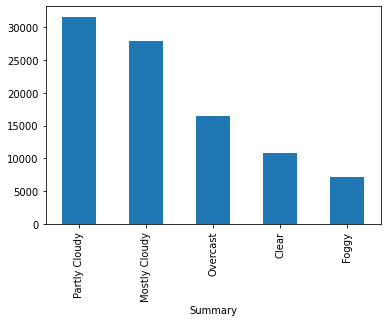

In [11]:
import matplotlib.pyplot as plt

precip_totals = (df
    .groupby("Summary")["Precip Type"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)
precip_totals.plot(kind="bar", fontsize=10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


If u want to learn  a model that u convert Formatted Date non-null  object -> to_date format

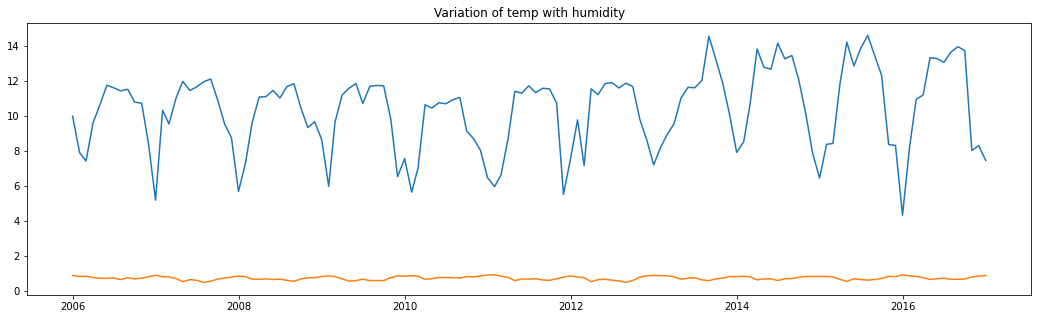

In [4]:
m_dataset = df[['Visibility (km)', 'Humidity']]
m_dataset = m_dataset.resample('M').mean()
plt.figure(figsize=(18,5))
plt.title('Variation of temp with humidity')
plt.plot(m_dataset)

In [7]:
import seaborn as sns
correlation = m_dataset.corr()
sns.heatmap(correlation, linewidths=.5, cmap="magma")

# Check correlation between 'Visibility (km)', 'Humidity' -> Low correlation 


NameError: name 'm_dataset' is not defined

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


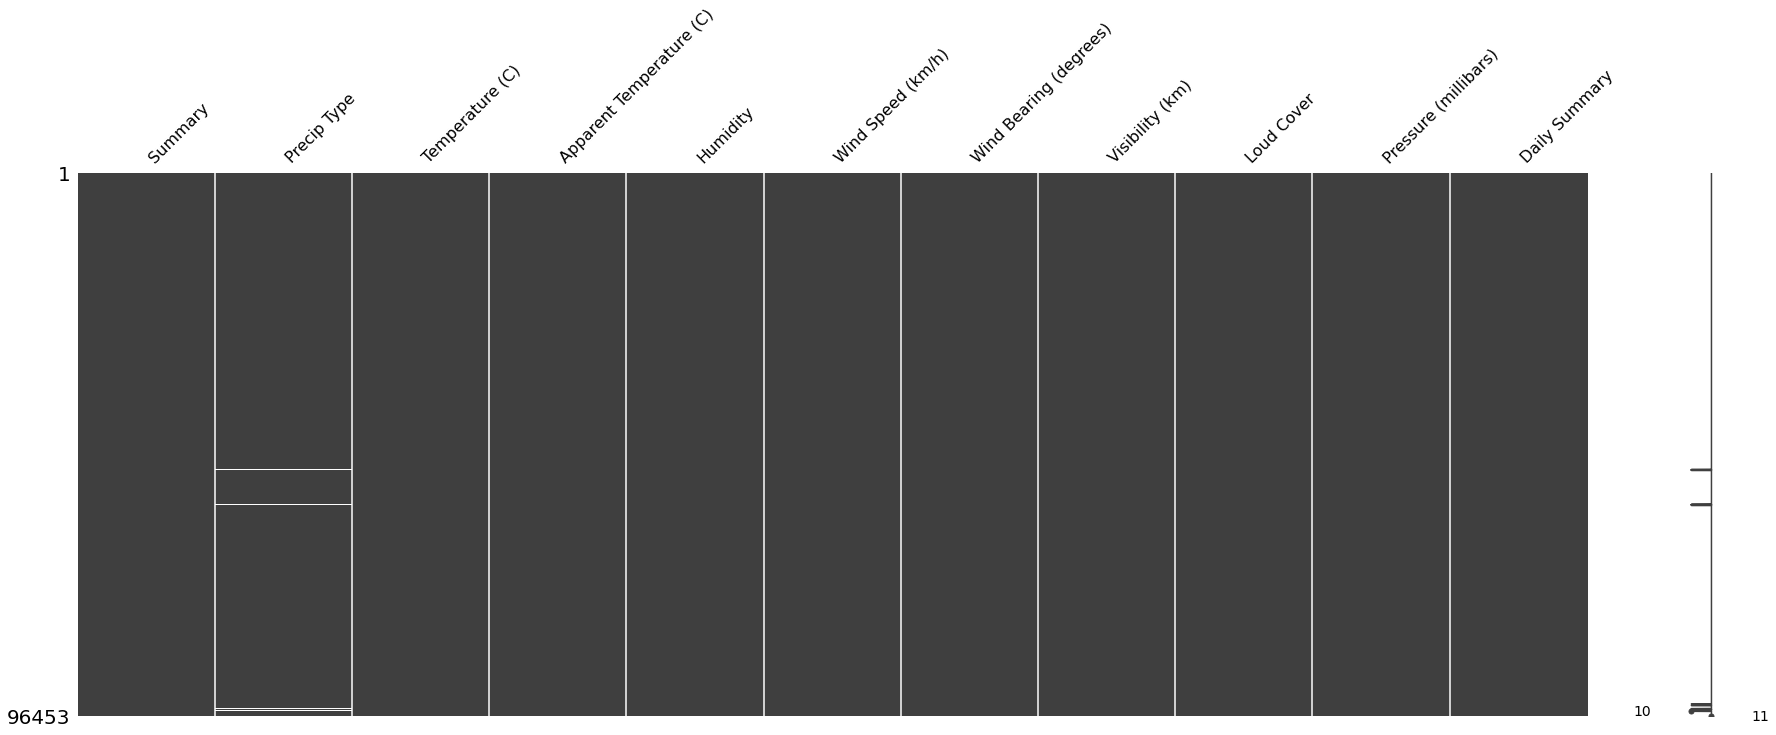

In [6]:
import missingno

# Alternatively, you can see the number of missing values like this
# Plot pic of dataset's missing values 
missingno.matrix(df, figsize = (30,10))
print(df.isnull().sum())

print(df.dtypes)

c:\Users\23\Desktop\start-pyspark\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

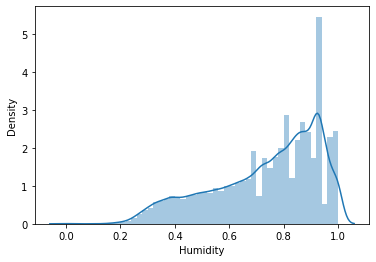

In [9]:
#Let's plot the distribution
#We will look at the distribution of each feature first if we can to 
# understand what kind of spread there is across the dataset.
sns.distplot(df.Humidity)

c:\Users\23\Desktop\start-pyspark\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\23\Desktop\start-pyspark\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Density'>

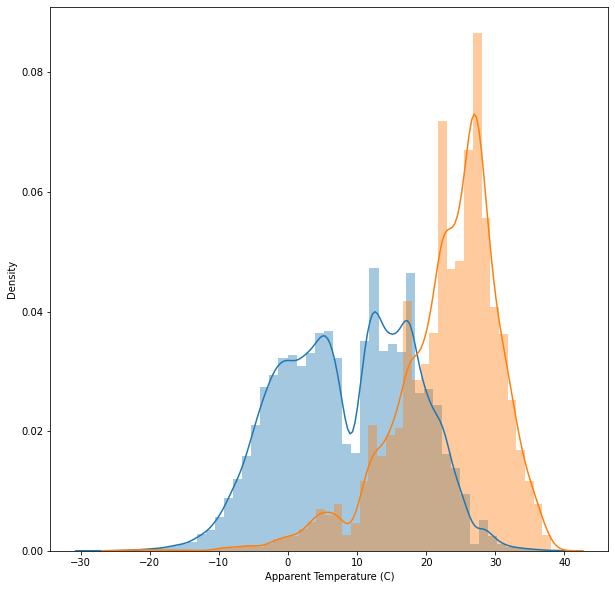

In [26]:
fig = plt.figure(figsize=(10, 10))

# Show changing Temperatures depends on Humidity
sns.distplot(df.loc[df['Humidity'] >= .5]['Apparent Temperature (C)'])
sns.distplot(df.loc[df['Humidity'] <= .5]['Apparent Temperature (C)'])

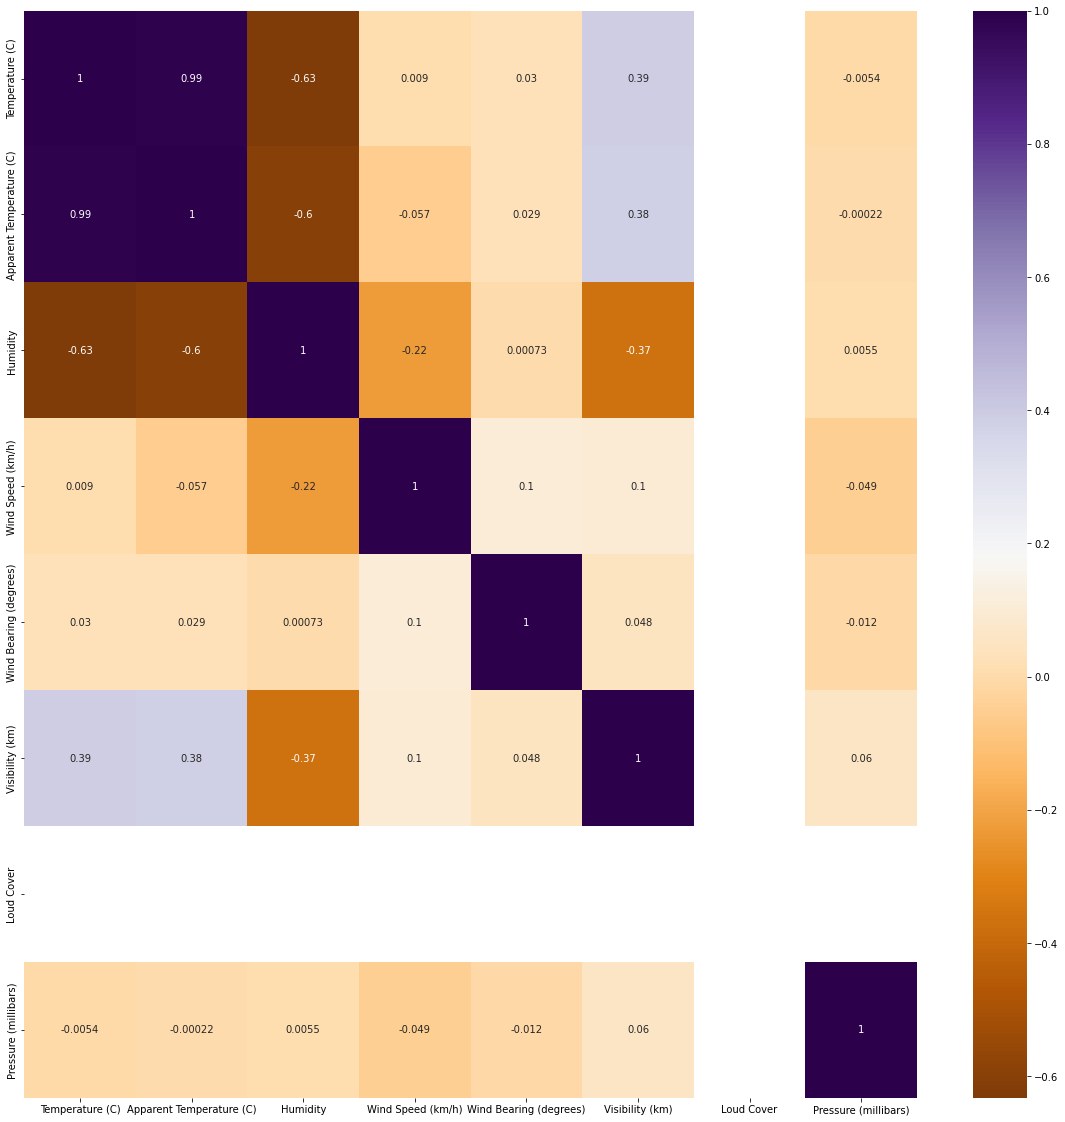

In [25]:
# Check correlation between features of dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="PuOr")

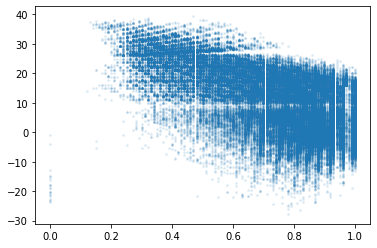

In [56]:
from matplotlib.colors import LinearSegmentedColormap

plt.scatter(df['Humidity'], df['Apparent Temperature (C)'], s=2, alpha=.1, marker="*")

Coeefficietn of Determination - R^2 > 0.36309180470630686
predicted response:
[ 5.74065448  6.72988858  5.74065448 ... 16.6222296  15.3032508
 14.9735061 ]


c:\Users\23\Desktop\start-pyspark\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

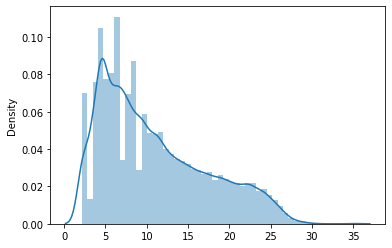

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(df['Humidity']).reshape(-1, 1)
y = np.array(df['Apparent Temperature (C)'])

model = LinearRegression()
model.fit(x, y)
print(f"Coeefficietn of Determination - R^2 > {model.score(x, y)}")



y_predict = model.predict(x) # x - регрессор
print(f"predicted response:\n{y_predict}")
sns.distplot(y_predict)


coefficient of determination: 0.4520862463057357
intercept: 0.8558822884062728
coefficients: [-0.0015443  -0.00044873]
predicted response:
[0.81997266 0.82127819 0.80193726 ... 0.6038917  0.61478906 0.63686056]


c:\Users\23\Desktop\start-pyspark\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

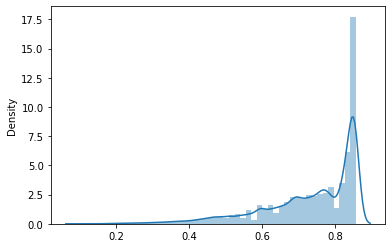

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


x = np.array(df['Apparent Temperature (C)']).reshape(-1, 1)
y = np.array(df['Humidity'])

x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)  # deg=2 - степень полинома (квадрат)
""" входной массив содержит два столбца: один с исходными входными данными, а другой с их квадратами."""


model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
# coefficient of determination: 0.8908516262498563

print(f"intercept: {model.intercept_}")
# intercept: 21.372321428571436

print(f"coefficients: {model.coef_}")
#coefficients: [-1.32357143  0.02839286]
""" Здесь .intercept_представляет 𝑏₀, а .coef_ссылается на массив, содержащий 𝑏₁ и 𝑏₂. """

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

sns.distplot(y_pred)